# Import Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("mobil_listrik.csv")

In [3]:
df.head()

,id_komentar,nama_akun,tanggal,text_cleaning,sentimen
0,Ugzbll5eyrIy3-gdUUJ4AaABAg,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif
1,UgzEDUiV3OTrV943p8p4AaABAg,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,negatif
2,UgwqJqu6JMF4EH2CsVV4AaABAg,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif
3,UgyYicCMR1rKwuOj2Y14AaABAg,yp office,2023-08-04 08:29:54+00:00,model jelek kwalitas buruk harga mahal croot,negatif
4,UgxKAcLuAwZOQK6es-x4AaABAg,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya ruma...,negatif


# Visualisasi

### Pie Chart

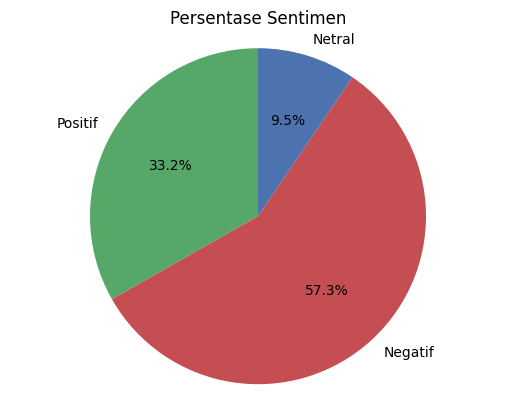

In [4]:
# Menghitung jumlah sentimen positif, negatif, dan netral
positif_count = df[df['sentimen'] == 'positif'].shape[0]
negatif_count = df[df['sentimen'] == 'negatif'].shape[0]
netral_count = df[df['sentimen'] == 'netral'].shape[0]

# Menyusun data sentimen dan label
sentimen = [positif_count, negatif_count, netral_count]
labels = ['Positif', 'Negatif', 'Netral']

# Menentukan warna untuk setiap sektor
colors = ['#55a868', '#c44e52', '#4c72b0']

# Membuat Pie Chart
plt.pie(sentimen, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Menambahkan judul
plt.title('Persentase Sentimen')

# Menampilkan Pie Chart
plt.axis('equal')
plt.show()

Dapat dilihat bahwa isi komentar lebih banyak pada label sentimen negatif. Ini berarti bahwa banyak masyarakat yang merasa tidak setuju atau tidak mendukung adanya pemberlakukan intensif mobil listrik di Indonesia.

### Wordcloud

In [5]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [6]:
from wordcloud import WordCloud

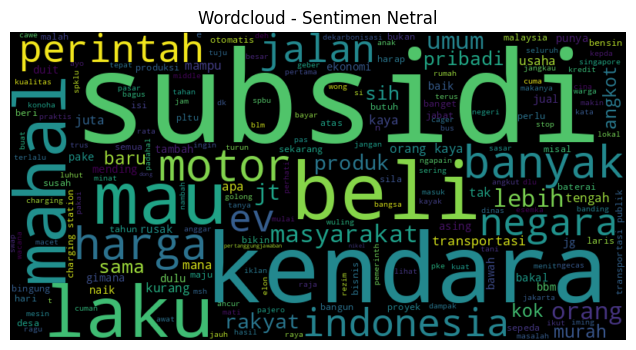

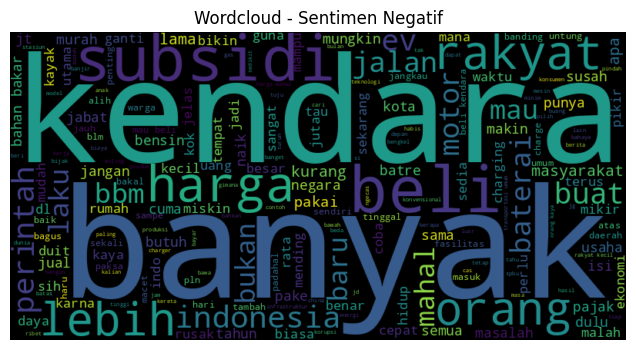

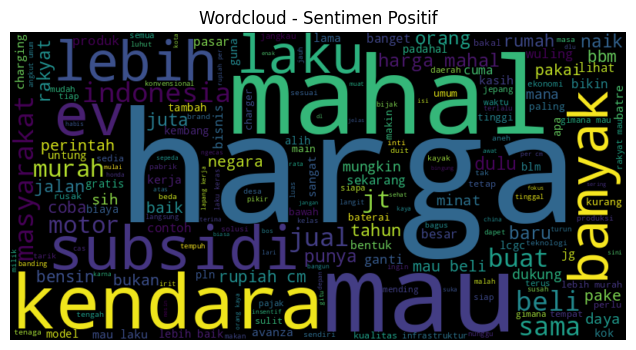

In [7]:
# Mengganti nilai NaN dengan string kosong ('') pada kolom "text_cleaning"
df['text_cleaning'] = df['text_cleaning'].fillna('')

# Membuat subset data untuk tiap kategori sentimen
df_neutral = df[df['sentimen'] == 'netral']
df_negative = df[df['sentimen'] == 'negatif']
df_positive = df[df['sentimen'] == 'positif']

# Menggabungkan semua kata dalam kolom "text_cleaning" untuk tiap kategori sentimen
text_neutral = ' '.join(df_neutral['text_cleaning'])
text_negative = ' '.join(df_negative['text_cleaning'])
text_positive = ' '.join(df_positive['text_cleaning'])

# Membuat objek WordCloud untuk tiap kategori sentimen
wordcloud_neutral = WordCloud(width=800, height=400).generate(text_neutral)
wordcloud_negative = WordCloud(width=800, height=400).generate(text_negative)
wordcloud_positive = WordCloud(width=800, height=400).generate(text_positive)

# Menampilkan wordcloud untuk tiap kategori sentimen secara terpisah
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Wordcloud - Sentimen Netral')
plt.axis('off')
plt.show()

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Wordcloud - Sentimen Negatif')
plt.axis('off')
plt.show()

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Wordcloud - Sentimen Positif')
plt.axis('off')
plt.show()

Dari visualisasi diatas merupakan wordcloud kata yang paling banyak muncul pada isi komentar yang memiliki label sentimen negatif. Kata yang paling sering muncul dan mengarah ke ulasan negatif membahas seputar : beli, subsidi, kendaraan, banyak dan sebagainya. Sehingga dari kata-kata ini bisa menjadi masukan untuk kebijakan "Intensif Mobil Listrik" untuk memeperhatikan kebutuhan masayarakat (subsidi, dan kendaraan), harga beli, dan lainnya.

Dari visualisasi diatas merupakan wordcloud kata yang paling banyak muncul pada isi komentar yang memiliki label sentimen positif. Kata yang paling sering muncul dan mengarah ke ulasan positif membahas seputar : subsidi, harga, ev, mahal dan sebagainya.

# Menyiapkan Data

In [8]:
COL = 'text_cleaning'

In [9]:
print(COL)
df.shape

text_cleaning


(1517, 5)

In [10]:
df.head()

,id_komentar,nama_akun,tanggal,text_cleaning,sentimen
0,Ugzbll5eyrIy3-gdUUJ4AaABAg,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif
1,UgzEDUiV3OTrV943p8p4AaABAg,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,negatif
2,UgwqJqu6JMF4EH2CsVV4AaABAg,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif
3,UgyYicCMR1rKwuOj2Y14AaABAg,yp office,2023-08-04 08:29:54+00:00,model jelek kwalitas buruk harga mahal croot,negatif
4,UgxKAcLuAwZOQK6es-x4AaABAg,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya ruma...,negatif


In [11]:
# Membuat mapping untuk encoding
sentimen_mapping = {"negatif": -1, "netral": 0, "positif": 1}

# Melakukan encoding pada kolom "sentimen"
df["sentimen_encoded"] = df["sentimen"].map(sentimen_mapping)

# TF-IDF

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
tfidf = TfidfVectorizer(min_df=3, max_df=0.5, ngram_range=(1, 1))
features = tfidf.fit_transform(df[COL].values)
dfuni = pd.DataFrame(features.todense(), columns=tfidf.get_feature_names_out())

In [14]:
print(dfuni.shape)

(1517, 1180)


In [15]:
dfuni.head()

,abis,ac,ada,adil,agya,ahli,air,airev,ajah,ajar,...,worth,woy,wuling,xenia,xpander,yah,yakin,yamaha,yo,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.227734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Split Data

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree, metrics
from sklearn.metrics import classification_report

In [17]:
dfuni['y'] = df['sentimen_encoded']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(dfuni.drop(['y'], axis=1), dfuni[['y']], test_size=0.30, random_state=555)

Pada proses ini akan digunakan library sklearn.model_selection dengan modul train_test _split untuk membagi data latih (X_train dan y_train) dan data uji (X_test dan y_test) dengan persentasi data latih 70% dan data uji 30% serta memilih label data yaitu yang merupakan variable independen dari data yaitu kolom sentimen untuk dijadikan parameter klasifikasi prediksi.

In [19]:
dfunitrain = X_train.join(y_train)
dfunitest = X_test.join(y_test)

In [20]:
X_unitrain = dfunitrain.drop(['y'], axis=1)
y_unitrain = dfunitrain['y']
X_unitest = dfunitest.drop(['y'], axis=1)
y_unitest = dfunitest['y']

# SVM

In [21]:
from sklearn import svm

In [22]:
clf = svm.SVC(max_iter=-1, 
            C=1000,
#             gamma=0.01,
            kernel='rbf')
# clf = svm.NuSVC(kernel='poly')
clf.fit(X_unitrain, y_unitrain.values.ravel())
y_unipred = clf.predict(X_unitest)
print(clf.score(X_unitest, y_unitest))
print(metrics.classification_report(y_unitest, y_unipred, digits=3))

0.7807017543859649
              precision    recall  f1-score   support

          -1      0.779     0.946     0.854       257
           0      0.556     0.106     0.179        47
           1      0.800     0.711     0.753       152

    accuracy                          0.781       456
   macro avg      0.711     0.587     0.595       456
weighted avg      0.763     0.781     0.751       456



Berdasarkan output tersebut, model SVM memiliki akurasi prediksi sebesar 78% untuk kasus "Analisis Sentimen Terkait Intensif Mobil Listrik" menggunakan data komentar pada platform Youtube